## Brand prescribing of Lithium ##
It is recommended that Lithium is prescibed to ensure a person receives the same preparation each time, as lithium comes as different salts which may result in different absoprtion and bioavailability. There has been recent ["supply disruption alert"](https://www.cas.mhra.gov.uk/ViewandAcknowledgment/ViewAlert.aspx?AlertID=103087) which has emphasised the importance of ensuring people are maintained on the same brand. In this notebook we will investigate brand prescribing of lithium.

In [1]:
#import libraries required for analysis
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq, charts, maps
import os

## caution - AMP level prescribing advised
Brand name prescribing is supported by assertions in the SDA and the BNF `Preparations vary widely in bioavailability; changing the preparation requires the same precautions as initiation of treatment.`

We will use the [NHS dm+d](https://ebmdatalab.net/what-is-the-dmd-the-nhs-dictionary-of-medicines-and-devices/) investigate what Litium products are recommended to be prescribed by brand name in the mandated standard i.e the VMP has a recommendation `caution - AMP level prescribing advised`.

In [2]:
sql = '''
SELECT 
id as snomed_id,
nm as name,
bnf_code,
pres_stat
FROM 
ebmdatalab.dmd.vmp_full
WHERE
bnf_code LIKE '0402030P0%' or 
bnf_code LIKE '0402030K0%'
'''

df_dmd_li_recommendations = bq.cached_read(sql, csv_path=os.path.join('..','data','df_dmd_li_recommendations.zip'))
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
df_dmd_li_recommendations



,snomed_id,name,bnf_code,pres_stat
0,321729005,Lithium carbonate 200mg modified-release tablets,0402030K0AAAIAI,Caution - AMP level prescribing advised
1,321730000,Lithium carbonate 250mg tablets,0402030K0AAACAC,Caution - AMP level prescribing advised
2,321734009,Lithium carbonate 400mg modified-release tablets,0402030K0AAAFAF,Caution - AMP level prescribing advised
3,321741003,Lithium citrate 509mg/5ml oral solution,0402030P0AAALAL,Valid as a prescribable product
4,321742005,Lithium citrate 1.018g/5ml oral solution,0402030P0AAAKAK,Valid as a prescribable product
5,4559411000001104,Lithium citrate 564mg modified-release tablets,0402030P0AAABAB,Invalid to prescribe in NHS primary care
6,8658611000001103,Lithium carbonate 200mg/5ml oral suspension,0402030K0AAAPAP,Valid as a prescribable product
7,36040211000001104,Lithium carbonate 450mg modified-release tablets,0402030K0AAAGAG,Caution - AMP level prescribing advised
8,36040311000001107,Lithium citrate 520mg/5ml oral solution sugar ...,0402030P0AAAIAI,Valid as a prescribable product


All tablets have a brand name prescribing as expected. Interstingly none of the liquids are recommended by dm+d to be prescribed by brand. The NHS dm+d editorial policy says this about it

> However where only one licensed AMP is/has been available and the VMP has an ‘approved’
generic name, then that product should not be marked with ‘Caution – AMP level prescribing
advise

There is no rationale as to why this is the case but from cursory look at our [NHS dm+d browser](https://openprescribing.net/dmd/) this does appear to hold true. If the stated aim is to reduce confusion between salts then I thik liquids should be marked as `‘Caution – AMP level prescribing advise` however this is a point for further discussion with dm+d and debate.

In [3]:
df_amp_recommended = pd.read_csv(os.path.join('..','data','df_amp_recommended.zip'))
df_amp_recommended['month'] = df_amp_recommended['month'].astype('datetime64[ns]')
df_amp_recommended.head(3)

,month,pct,bnf_name,bnf_code,total_items
0,2010-08-01,06F,Beclomet Diprop_Inha B/A 50mcg(200 D)CFF,0302000C0AABGBG,1
1,2010-08-01,03L,Calcicard CR_Tab 90mg,0206020C0BCACAC,2
2,2010-08-01,03F,Buprenorphine_Patch 70mcg/hr (96hr),0407020B0AAAGAG,11


In [4]:
df_lithium = df_amp_recommended.loc[df_amp_recommended["bnf_code"].str.startswith(('0402030P0','0402030K0'))]
df_lithium.head(5)

,month,pct,bnf_name,bnf_code,total_items
32,2010-08-01,05R,Priadel_Tab 200mg,0402030K0BFABAI,87
91,2010-08-01,01X,Lithium Carb_Tab Slow 400mg,0402030K0AAAFAF,12
123,2010-08-01,08N,Priadel_Tab 200mg,0402030K0BFABAI,28
135,2010-08-01,15N,Lithium Carb_Tab Slow 450mg,0402030K0AAAGAG,6
162,2010-08-01,03W,Priadel_Tab 200mg,0402030K0BFABAI,76


In [5]:
df_lithium.bnf_name.unique()

array(['Priadel_Tab 200mg', 'Lithium Carb_Tab Slow 400mg',
       'Lithium Carb_Tab Slow 450mg', 'Lithium Carb_Tab Slow 200mg',
       'Camcolit 250_Tab 250mg', 'Liskonum_Tab 450mg',
       'Priadel_Tab 400mg', 'Lithium Carb_Tab 250mg',
       'Camcolit 400_Tab 400mg', 'Lithonate_Tab 400mg',
       'Lithium Carb_Tab 200mg M/R', 'Lithium Carb_Tab 400mg M/R',
       'Lithium Carb_Tab 450mg M/R', 'Liskonum_Tab 450mg M/R'],
      dtype=object)

In [6]:
df_lithium_generic = df_lithium.loc[df_lithium["bnf_code"].str.contains('AA\w{4}$')]
df_lithium_generic.bnf_name.unique()

array(['Lithium Carb_Tab Slow 400mg', 'Lithium Carb_Tab Slow 450mg',
       'Lithium Carb_Tab Slow 200mg', 'Lithium Carb_Tab 250mg',
       'Lithium Carb_Tab 200mg M/R', 'Lithium Carb_Tab 400mg M/R',
       'Lithium Carb_Tab 450mg M/R'], dtype=object)

(0, 24980.0)

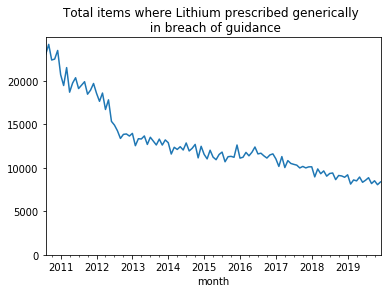

In [7]:
df_lithium_generic.groupby("month")['total_items'].sum().plot(kind='line', title="Total items where Lithium prescribed generically \n in breach of guidance")
plt.ylim(0, )

There is quite a reduction in generic prescribing in mid-2012. WE could investigate this further to see if it sheds any light on effective implementation. MOst likely there are product changes, EHR change or substantial work by a meds opt teams.

In [8]:
df_lithium_generic.groupby(['bnf_code', 'bnf_name']).sum().reset_index().sort_values(by = 'total_items', ascending = False).head(25)

,bnf_code,bnf_name,total_items
2,0402030K0AAAFAF,Lithium Carb_Tab Slow 400mg,485898
6,0402030K0AAAIAI,Lithium Carb_Tab Slow 200mg,333701
1,0402030K0AAAFAF,Lithium Carb_Tab 400mg M/R,309633
5,0402030K0AAAIAI,Lithium Carb_Tab 200mg M/R,216771
0,0402030K0AAACAC,Lithium Carb_Tab 250mg,91465
4,0402030K0AAAGAG,Lithium Carb_Tab Slow 450mg,12445
3,0402030K0AAAGAG,Lithium Carb_Tab 450mg M/R,8231


In [9]:
df_lithium_generic_ccg = df_lithium_generic.groupby(['month', 'pct']).sum().reset_index()
df_lithium_generic_ccg.head()

,month,pct,total_items
0,2010-08-01,00L,67
1,2010-08-01,00N,21
2,2010-08-01,00P,249
3,2010-08-01,00Q,47
4,2010-08-01,00R,95


In [10]:
df_lithium_ccg = df_lithium.groupby(['month', 'pct']).sum().reset_index()
df_lithium_ccg.head(2)

,month,pct,total_items
0,2010-08-01,00L,588
1,2010-08-01,00N,234


In [11]:
df_li_measure = pd.merge(df_lithium_generic_ccg, df_lithium_ccg,  how='left', left_on=['month','pct'], right_on = ['month','pct'], suffixes=("_generic_lithium", "_all_lithum_rx"))
df_li_measure["measure_value"] =  100*(df_li_measure.total_items_generic_lithium / df_li_measure.total_items_all_lithum_rx)
df_li_measure.head()

,month,pct,total_items_generic_lithium,total_items_all_lithum_rx,measure_value
0,2010-08-01,00L,67,588,11.394558
1,2010-08-01,00N,21,234,8.974359
2,2010-08-01,00P,249,478,52.092050
3,2010-08-01,00Q,47,210,22.380952
4,2010-08-01,00R,95,267,35.580524


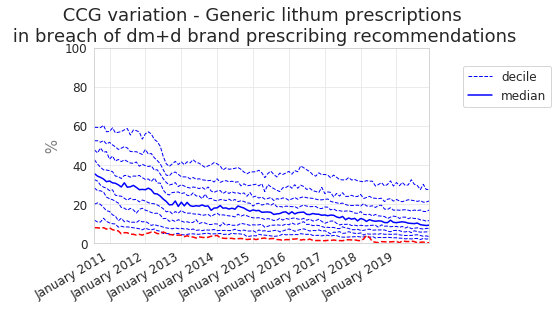

In [12]:
charts.deciles_chart(
    df_li_measure,
    period_column='month',
    column='measure_value',
    title=" CCG variation - Generic lithum prescriptions \n in breach of dm+d brand prescribing recommendations",
    ylabel=" % ",
    show_outer_percentiles=False,
    show_legend=True
) 

#add in example CCG (Devon)
df_subject = df_li_measure.loc[df_li_measure['pct'] == '15N']
plt.plot(df_subject['month'], df_subject['measure_value'], 'r--')

plt.ylim(0, 100)
plt.show()